In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from scipy.integrate import odeint
from scipy.optimize import curve_fit
import os
from scipy.special import lambertw
#EoM2 is full model equations
import EoM2
from EoM2 import deriv2
#EoMaveraged is spatially averaged (no gradient) equations
from EoMaveraged import derivAve
#Params2 is the numerical values used for integration (as well as physical constants)
import Params2
import importlib as imp

In [10]:
'''load current directory'''
pathorig = os.getcwd()

The following cell loads numerical information for full model and integrates it forward in time.

In Params2 file, can change Nmet to refer to having 3 or 4 metabolites in the system.  3 refers to A->B->C.  4 means now we also add B->X.  I can also change constext: True means the external concentration in s constant.  False means it is variable in time.

In [53]:
#CELL 1

os.chdir(pathorig)
imp.reload(Params2)
imp.reload(EoM2)
from EoM2 import deriv2
'''create directory for specific kc, Vcde case'''
'''pathparam = 'kp='+str(Params2.kcP)+'_Vcde='+str(int(Params2.Vcde))
if not os.path.isdir(pathparam):
    os.mkdir(pathparam)'''

'''change into specific kc, Vcde case'''
#os.chdir(pathparam)

'''This is how parameters and initial values of variables are assigned - through the import of the Params.py file
Right now we have a random value chosen for initial concentrations, but can put something else as desired'''
Nmet = Params2.Nmet
p = Params2.p
numgrid = np.int(Params2.numgrid)
nM = Nmet*(numgrid+1)
tfinal = Params2.tfinal
tau = Params2.tau
constext = Params2.constext

if constext:
    v2 = np.zeros(nM)
    '''This portion rescales the x axis from "mass" to scaled radius. Can rescale by Rc once that is defined in the parameter file'''
    rho = Rc*np.power(np.arange(0,1,p[-1]),np.divide(1,3.0))
else:
    v2 = np.zeros(nM+Nmet)
    v2[:-Nmet] = np.zeros(nM)
    v2[-Nmet] = Params2.acyt
    v2[-Nmet+1] = Params2.bcyt
    v2[-Nmet+2] = Params2.ccyt
    if Nmet==4:
        v2[-Nmet+3] = Params2.xcyt
    '''This portion rescales the x axis from "mass" to scaled radius. Can rescale by Rc once that is defined in the parameter file'''
    rho = Rc*np.power(np.arange(0,1+p[-1],p[-1]),np.divide(1,3.0))
t = np.linspace(0,tfinal,700)
Rc = Params2.Rc

'''This is the actual integration using the equations of motion and the desired discretization'''
sol = odeint(deriv2,v2,t,args = (p,constext))

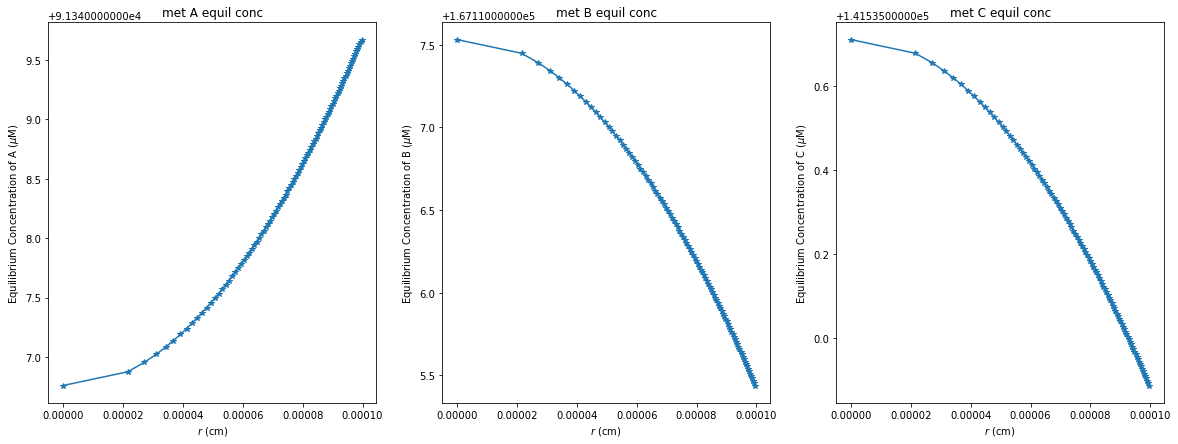

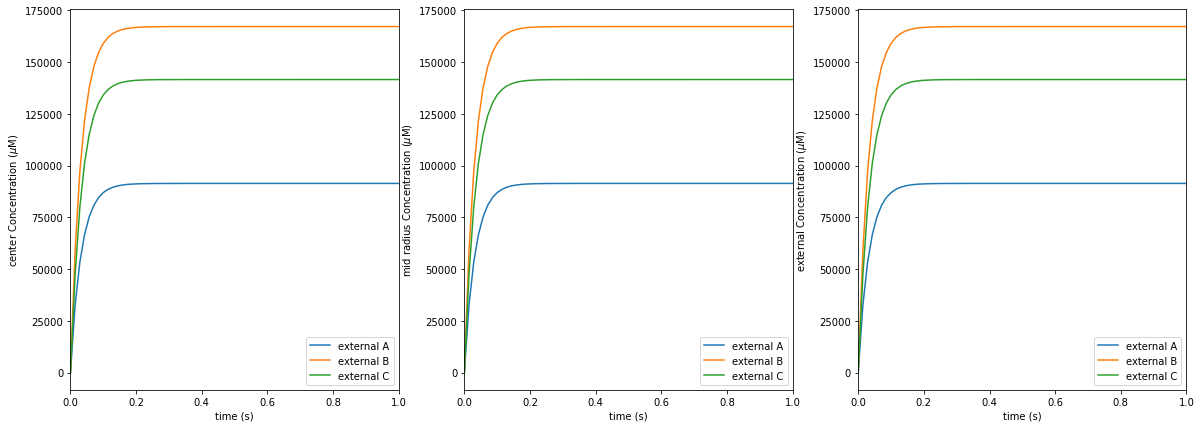

In [54]:
'''#This portion splits the propendiol and aldehyde concentrations into 2 separate vectors and records only the steady state values
(or the value at the last time point)'''
aeq = sol[-1,:-Nmet:Nmet]*Params2.Kab
beq = sol[-1,1:-Nmet:Nmet]*Params2.Kbc
ceq = sol[-1,2:-Nmet:Nmet]*Params2.Kbc
if Nmet == 4:
    xeq = sol[-1,3:-Nmet:Nmet]*Params2.Kbc
#This portion plots the final concentration of each protein as a function of radius
# plt.rc('text', usetex=True)
fig,axs = plt.subplots(1,Nmet,figsize=(20,7))
eqs = [aeq,beq,ceq]
names = ['A','B','C']
if Nmet == 4:
    eqs = [aeq,beq,ceq,xeq]
    names = ['A','B','C','X']
for (ax,meq,name) in zip(axs,eqs,names):
    ax.plot(rho,meq,'-*')
    ax.set_xlabel('$r$ (cm)')
    ax.set_yscale('linear')
    ax.set_ylabel('Steady State Concentration of '+name+' ($\mu$M)')
    ax.set_title('met '+name+' ss conc')
plt.show()

fig,axs = plt.subplots(1,3,figsize=(20,7))
for n,(j,tm) in enumerate(zip([0,50,-1],['center','mid radius','external'])):
    axs[n].plot(t*tau, sol[:,Nmet*j+0]*Params2.Kab, label = 'external A')
    axs[n].plot(t*tau, sol[:,Nmet*j+1]*Params2.Kbc, label = 'external B')
    axs[n].plot(t*tau, sol[:,Nmet*j+2]*Params2.Kbc, label = 'external C')
    if Nmet == 4:
        axs[n].plot(t*tau, sol[:,Nmet*j+3]*Params2.Kbc, label = 'external X')
    axs[n].legend(loc='lower right')
    axs[n].set_xlabel('time (s)')
    axs[n].set_xlim((0,1))
    axs[n].set_ylabel(tm+' Concentration ($\mu$M)')
#plt.savefig('externalConcentration.png')
plt.show()

In [30]:
eqs[1]

array([129262.41352362, 129262.40514556, 129262.39933654, 129262.39443702,
       129262.39005732, 129262.38602957, 129262.38226242, 129262.37869931,
       129262.37530217, 129262.37204385, 129262.36890412, 129262.36586741,
       129262.3629214 , 129262.36005614, 129262.35726345, 129262.3545365 ,
       129262.3518695 , 129262.34925751, 129262.34669624, 129262.34418199,
       129262.34171146, 129262.33928178, 129262.33689037, 129262.33453493,
       129262.33221338, 129262.32992386, 129262.32766467, 129262.32543426,
       129262.32323122, 129262.32105425, 129262.31890216, 129262.31677386,
       129262.31466832, 129262.3125846 , 129262.31052182, 129262.30847918,
       129262.30645589, 129262.30445125, 129262.30246459, 129262.30049529,
       129262.29854274, 129262.2966064 , 129262.29468574, 129262.29278026,
       129262.2908895 , 129262.289013  , 129262.28715036, 129262.28530117,
       129262.28346504, 129262.28164162, 129262.27983057, 129262.27803154,
       129262.27624424, 1

700 306


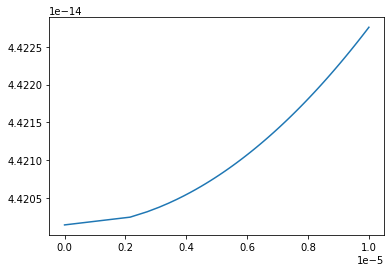

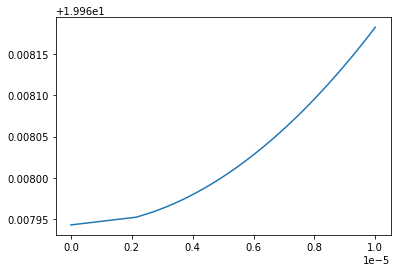

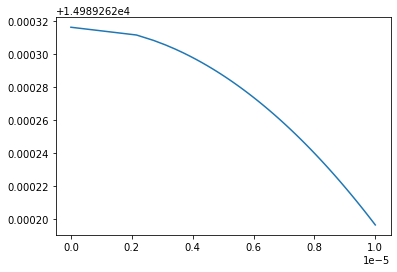

In [37]:
print(len(sol),len(sol[0]))
plt.plot(rho,sol[-1,:-3:3]*Params2.Kcde)
plt.show()
plt.plot(rho,sol[-1,1:-3:3]*Params2.Kpq)
plt.show()
plt.plot(rho,sol[-1,2:-3:3]*Params2.Kpq)
plt.show()

The following cell takes full model and plots the output of the external metabolite concentration as a function of time

<ipython-input-4-d2e874826716>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = plt.subplot(311)


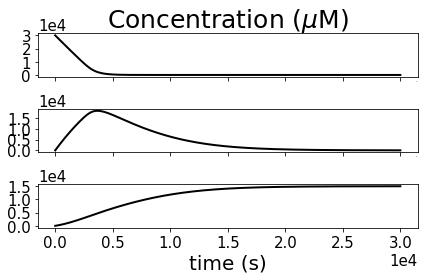

In [4]:
#CELL 2

fig = plt.figure()
ax = fig.add_subplot(111)    # The big subplot
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')



ax1 = plt.subplot(311)
outside, = plt.plot(t*taucde/p[3], sol[:,-3]*Params2.Kcde, color = 'black',lw = 2, label = 'external 1,2-propanediol')
plt.setp(ax1.get_xticklabels(), visible = False)
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.tick_params(axis='both', which='minor', labelsize=18)
ax1.yaxis.get_offset_text().set_fontsize(15)
ax1.xaxis.get_offset_text().set_fontsize(1)
plt.locator_params(axis='y', nbins=5)
#plt.xlim([0,400])

ax2 = plt.subplot(312, sharex=ax1)
outside2, = plt.plot(t*taucde/p[3], sol[:,-2]*Params2.Kpq, color = 'black',lw = 2, label = 'external propionaldehyde')
plt.setp(ax2.get_xticklabels(), visible = False)
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
ax2.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='minor', labelsize=18)
ax2.yaxis.get_offset_text().set_fontsize(15)
ax2.xaxis.get_offset_text().set_fontsize(1)
plt.locator_params(axis='y', nbins=5)

ax3 = plt.subplot(313, sharex=ax1)
outside3, = plt.plot(t*taucde/p[3], sol[:,-1]*Params2.Kpq, color = 'black',lw = 2, label = 'external 1-propanol')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
plt.xlabel('time (s)', fontsize = 20)

ax1.set_title('Concentration ($\mu$M)', fontsize = 25)
ax3.tick_params(axis='both', which='major', labelsize=15)
ax3.tick_params(axis='both', which='minor', labelsize=18)
ax3.yaxis.get_offset_text().set_fontsize(15)
ax3.xaxis.get_offset_text().set_fontsize(15)
plt.locator_params(axis='y', nbins=5)
plt.tight_layout()
#plt.savefig('kVjustP.png')
plt.show()

The following cell fits the external concentration to a linear combination of Lambert W and exp functions. This is to
determine whether or not the permeability is recoverable. This analysis is only done as a rough estimate of recoverability.
To do this analysis, tau_upper and Km_upper must me adjusted every so often for it to fit properly

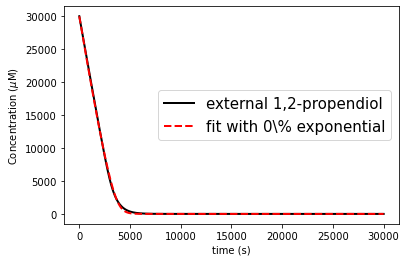

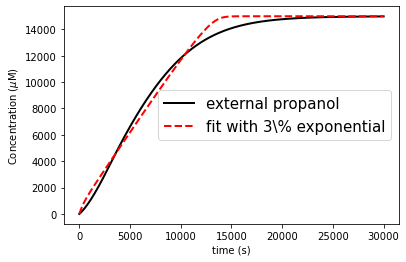

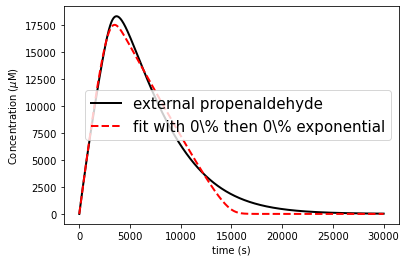

In [6]:
#CELL 3

tau_upper = 400
Km_upper = 25000

AmpP = Params2.Pcyt
AmpC = Params2.Pcyt/2.0

def P(t, tauPexp, tauPlam, Km,f):
    P = AmpP*f*np.exp(-t/tauPexp)+(1-f)*Km*np.real(lambertw((AmpP/Km)*np.exp(AmpP/Km)*np.exp(-t/tauPlam)))
    return P

def A(t, Amp, tauAexp1, tauAlam1, tauAexp2, tauAlam2, Km1, Km2,f1, f2):
    A = Amp*f1*np.exp(-t/tauAexp1)+(1-f1)*Km1*np.real(lambertw((Amp/Km1)*np.exp(Amp/Km1)*np.exp(-t/tauAlam1)))- Amp*f2*np.exp(-t/tauAexp2)-(1-f2)*Km2*np.real(lambertw((Amp/Km2)*np.exp(Amp/Km2)*np.exp(-t/tauAlam2)))
    return A

def C(t, tauCexp, tauClam, Km,f):
    P = AmpC - AmpC*f*np.exp(-t/tauCexp)-Km*(1-f)*np.real(lambertw((AmpC/Km)*np.exp(AmpC/Km)*np.exp(-t/tauClam)))
    return P



time = t[:len(t)]*taucde/p[3]

#pull out data for each molecule
Pdata = sol[:len(t),-3]*Params2.Kcde
Adata = sol[:len(t),-2]*Params2.Kpq
Cdata = sol[:len(t),-1]*Params2.Kpq

Popt, Pcov = curve_fit(P, time, Pdata, [tau_upper/2, tau_upper/2, Km_upper/2, 0.5] , bounds=(0, [ tau_upper, tau_upper, Km_upper, 1]))
# plt.rc('text', usetex=True)
# plt.rcParams.update({"text.usetex":True})
data, = plt.plot(time, Pdata, color = 'black', lw = 2, label = 'external 1,2-propendiol')
fit, = plt.plot(time, P(time, *Popt), '--r', lw = 2, label = 'fit with {0}\% exponential'.format(int(Popt[-1]*100)))
plt.xlabel('time (s)')
plt.ylabel('Concentration ($\mu$M)')
plt.legend(handles = [data,fit], loc = 7, prop={'size': 15})
plt.savefig('Pfit.png')
plt.show()

Copt, Ccov = curve_fit(C, time, Cdata, [tau_upper/2, tau_upper/2, Km_upper/2, 0.5] , bounds=(0, [tau_upper, tau_upper, Km_upper, 1]))
# plt.rc('text', usetex=True)
data, = plt.plot(time, Cdata, color = 'black', lw = 2, label = 'external propanol')
fit, = plt.plot(time, C(time, *Copt), '--r', lw = 2, label = 'fit with {}\% exponential'.format(int(Copt[-1]*100)))
plt.xlabel('time (s)')
plt.ylabel('Concentration ($\mu$M)')
plt.legend(handles = [data,fit], loc = 7, prop={'size': 15})
plt.savefig('Cfit.png')
plt.show()


Aopt, Acov = curve_fit(A, time, Adata, [np.max(Adata), Copt[0], Copt[1], Popt[0], Popt[1], Copt[-2], Popt[-2], Copt[-1],Popt[-1]],
                       ftol = 1e-5, bounds=(0, [Params2.Pcyt*2, tau_upper, tau_upper, tau_upper, tau_upper, Km_upper, Km_upper, 1,1]))
# plt.rc('text', usetex=True)
data, = plt.plot(time, Adata, color = 'black', lw = 2, label = 'external propenaldehyde')
fit, = plt.plot(time, A(time, *Aopt), '--r', lw = 2, label = 'fit with {0}\% then {1}\% exponential'.format(int(Aopt[-1]*100), int(Aopt[-2]*100)))
plt.xlabel('time (s)')
plt.ylabel('Concentration ($\mu$M)')
plt.legend(handles = [data,fit], loc = 7, prop={'size': 15})
plt.savefig('Afit.png')
plt.show()


The following cell saves the fit information from the previous one as well as the numerical information used to generate the data. This information can be used to create the recoverability diagram

In [7]:
#CELL 4

tau = np.array([Popt[0], Popt[1], Aopt[1], Aopt[2], Aopt[3], Aopt[4], Copt[0], Copt[1]])
fs = np.array([Popt[-1], Aopt[-2], Aopt[-1], Copt[-1]])
tauerror = np.array([np.sqrt(Pcov[0,0]), np.sqrt(Pcov[1,1]), np.sqrt(Acov[1,1]), np.sqrt(Acov[2,2]), np.sqrt(Acov[3,3]), np.sqrt(Acov[4,4]), np.sqrt(Ccov[0,0]), np.sqrt(Ccov[1,1]) ])
fserror = np.array([np.sqrt(Pcov[-1,-1]), np.sqrt(Acov[-2,-2]), np.sqrt(Acov[-1,-1]), np.sqrt(Ccov[-1,-1])])

#also create a file with the 4 relevant rates calculated from 
ttp = (Params2.Rc/(3*Params2.kcP))*Params2.Vratio
tta = (Params2.Rc/(3*Params2.kcA))*Params2.Vratio
tpa = (Params2.Kcde/Params2.Vcde)*Params2.Vratio
tac = (Params2.Kpq/(2*Params2.Vpq))*Params2.Vratio
tac2 = (Params2.Kpq/Params2.Vpq)*Params2.Vratio
rates = np.array([ttp, tta, tpa, tac, tac2])

'''change back to original directory'''
os.chdir(pathorig)

'''NEED TO STILL CREATE FILES AND SAVE WITH ALL THE RELEVANT DATA THAT I PULLED OUT IN THIS CELL'''
filename ='tau-reaction1.txt'
filename2 ='tauerror-reaction1.txt'
filename3 ='f-reaction1.txt'
filename4 ='ferror-reaction1.txt'
filename5 ='rates-reaction1.txt'
taucompare = np.array([np.concatenate((np.array([Params2.kcP, Params2.Vcde]),tau))])
errors = np.array([np.concatenate((np.array([Params2.kcP, Params2.Vcde]),tauerror))])
fcompare = np.array([np.concatenate((np.array([Params2.kcP, Params2.Vcde]),fs))])
ferrors = np.array([np.concatenate((np.array([Params2.kcP, Params2.Vcde]),fserror))])
ratecompare = np.array([np.concatenate((np.array([Params2.kcP, Params2.Vcde]),rates))])

if os.path.exists(filename):
    append_write = 'a' # append if already exists
else:
    append_write = 'w' # make a new file if not

taufile = open(filename,append_write)
np.savetxt(taufile,taucompare,fmt='%.3e',delimiter = " ")
taufile.close()

tauerrorfile = open(filename2,append_write)
np.savetxt(tauerrorfile,errors,fmt='%.3e',delimiter = " ")
tauerrorfile.close()

ffile = open(filename3,append_write)
np.savetxt(ffile,fcompare,fmt='%.3e',delimiter = " ")
ffile.close()

ferrorfile = open(filename4,append_write)
np.savetxt(ferrorfile,ferrors,fmt='%.3e',delimiter = " ")
ferrorfile.close()

ratesfile = open(filename5,append_write)
np.savetxt(ratesfile,ratecompare,fmt='%.3e',delimiter = " ")
ratesfile.close()

The following cell creates a time varying plot of the concentration inside of the MCP. Allows you to visualize gradients and how they change over time. In most cases (unless D is changed drastically) this will look like a flat line moving up and down as there will be no spatial gradient

MovieWriter ffmpeg unavailable; using Pillow instead.


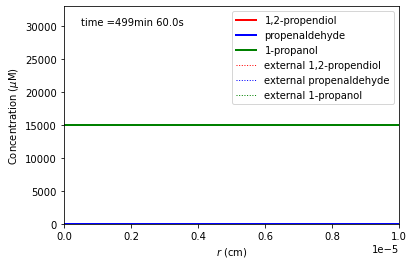

In [8]:
#CELL 5

'''This cell creates a "movie" of the concentration of both proteins with respect to radius as a function of time. This can be used
to watch how the whole MCP reaches equilibrium'''

fig = plt.figure()
ax = plt.axes(xlim=(0, np.max(rho)), ylim=(0, max(Params2.Pcyt, Params2.Acyt,np.max(sol[:,::3])*Params2.Kcde, np.max(sol[:,1::3])*Params2.Kpq,
                                                  np.max(sol[:,2::3])*Params2.Kpq)*1.1))
# plt.rc('text', usetex=True)
plt.xlabel('$r$ (cm)')
plt.ylabel('Concentration ($\mu$M)')
time_text = ax.text(0.05, 0.95,'',horizontalalignment='left',verticalalignment='top', transform=ax.transAxes)
line, = ax.plot([], [], lw=2, color ='red', label = '1,2-propendiol')
line2, = ax.plot([],[], lw = 2, color = 'blue', label = 'propenaldehyde')
line3, = ax.plot([],[], lw = 2, color = 'green', label = '1-propanol')
outside, = ax.plot([],[], ls = ':', lw = 1, color = 'red', label = 'external 1,2-propendiol')
outside2, = ax.plot([],[], ls = ':', lw = 1, color = 'blue', label = 'external propenaldehyde')
outside3, = ax.plot([],[], ls = ':', lw = 1, color = 'green', label = 'external 1-propanol')
plt.legend(handles = [line,line2,line3,outside, outside2, outside3])
def init():
    line.set_data([], [])
    line2.set_data([],[])
    outside.set_data([], [])
    outside2.set_data([],[])
    outside3.set_data([],[])
    time_text.set_text(" ")
    return line, line2, line3, outside, outside2, outside3, time_text

# animation function.  This is called sequentially
def animate(i):
    x = rho
    y = sol[i,:-3:3]*Params2.Kcde
    z = sol[i,1:-3:3]*Params2.Kpq
    w = sol[i,2:-3:3]*Params2.Kpq
    y2 = np.ones(np.shape(rho))*sol[i,-3]*Params2.Kcde
    z2 = np.ones(np.shape(rho))*sol[i,-2]*Params2.Kpq
    w2 = np.ones(np.shape(rho))*sol[i,-1]*Params2.Kpq
    line.set_data(x, y)
    line2.set_data(x,z)
    line3.set_data(x,w)
    outside.set_data(x,y2)
    outside2.set_data(x,z2)
    outside3.set_data(x,w2)
    time_text.set_text('time ={:.0f}min {:.1f}s'.format(int(t[i]*taucde/(60*p[3]) ),t[i]*taucde/p[3]-int(t[i]*taucde/(60*p[3]))*60))
    return line, line2, line3, outside, outside2, outside3, time_text
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=np.linspace(0,len(t)-1,200).astype(int), interval=30, blit=True)

anim.save('ConcentrationVsTime.gif')
plt.show()

The following cell treats diffusion as instantaneous and the grid inside the cell can be averaged in such a way that you only have to model external concentration, boundary concentration, and internal concentration. The reason boundary concentration and internal concentration is modeled separately is because we assume there are no reactions occuring on the boundary so regardless of the speed of diffusion, the boundary and cytosol concentrations are driven by differential equations of different forms.

This is a simplified model. The three spatial points (outside, boundary, inside) can be simplified to 2 (outside, inside) with the appropriate math. This is not done here, but is done in the optimization routine - so routine optimizes based on the 2 point model using data generated from the 3 point model. I have tested that they produce exactly identical results

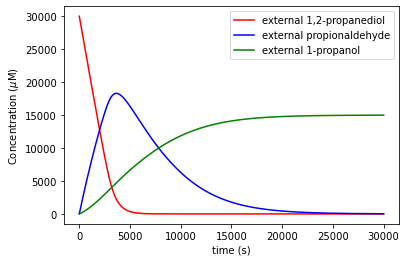

In [9]:
#CELL 6

imp.reload(Params2)
import EoMaveraged
imp.reload(EoMaveraged)
from EoMaveraged import derivAve

nM = Params2.nM
tfinal = Params2.tfinal
taucde = Params2.taucde
vave = np.zeros(9)
vave[-1] = Params2.ccyt
vave[-3] = Params2.pcyt
vave[-2] = Params2.acyt
t = np.linspace(0,tfinal,501)
Rc = Params2.Rc
p = Params2.p

'''This is the actual integration using the equations of motion and the desired discretization'''
solave = odeint(derivAve,vave,t,args = (p,))
outside, = plt.plot(t*taucde/p[3], solave[:,-3]*Params2.Kcde, color = 'red', label = 'external 1,2-propanediol')
outside2, = plt.plot(t*taucde/p[3], solave[:,-2]*Params2.Kpq, color = 'blue', label = 'external propionaldehyde')
outside3, = plt.plot(t*taucde/p[3], solave[:,-1]*Params2.Kpq,color = 'green', label = 'external 1-propanol')
plt.xlabel('time (s)')
plt.ylabel('Concentration ($\mu$M)')
plt.legend(handles = [outside, outside2, outside3])
#plt.savefig('externalConcentration.png')
plt.show()

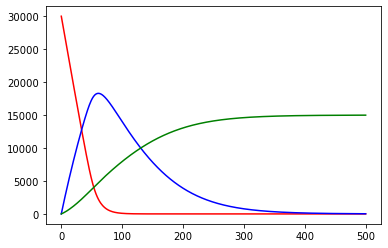

In [10]:
#CELL 7

outside, = plt.plot(solave[:,-3]*Params2.Kcde, color = 'red', label = 'external 1,2-propanediol')
outside2, = plt.plot(solave[:,-2]*Params2.Kpq, color = 'blue', label = 'external propionaldehyde')
outside3, = plt.plot(solave[:,-1]*Params2.Kpq,color = 'green', label = 'external 1-propanol')
plt.show()

Adding noise and subsampling.

Data for optimization must be noisy (to simulate real life, and because optimization works better with some noise). The subsampling term is done so that a new integration doesn't need to be run each time I want to decrease the number of data points tested. The "points" value is the number of simulated data points skipped between each "measured" one.

In [11]:
#CELL 8

points = 10
Mtimes = np.zeros(len(t))
Mtimes[::points] = 1

noiseP = 0.05*np.max(solave[:,-3])*Params2.Kcde
noiseA = 0.05*np.max(solave[:,-2])*Params2.Kpq
noiseC = 0.05*np.max(solave[:,-1])*Params2.Kpq
Pextsub = np.zeros(len(t))
Pextsub[::points] = solave[::points,-3]*Params2.Kcde + np.random.normal(0,noiseP,len(Pextsub[::points]))
Aextsub = np.zeros(len(t))
Aextsub[::points] = solave[::points,-2]*Params2.Kpq + np.random.normal(0,noiseA,len(Aextsub[::points]))
Cextsub = np.zeros(len(t))
Cextsub[::points] = solave[::points,-1]*Params2.Kpq + np.random.normal(0,noiseC,len(Cextsub[::points]))

The next cell plot the external data with noise added and subsampled. This is done to give an "eyeball test" of the noise addition and to make sure there are no glaring mistakes.

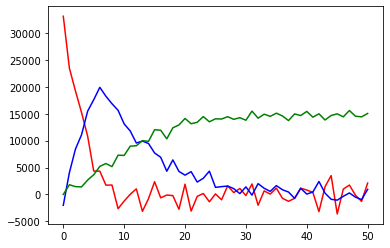

In [12]:
#CELL 9

outside, = plt.plot(Pextsub[::points], color = 'red', label = 'external 1,2-propanediol')
outside2, = plt.plot(Aextsub[::points], color = 'blue', label = 'external propionaldehyde')
outside3, = plt.plot(Cextsub[::points],color = 'green', label = 'external 1-propanol')
plt.show()

The next cell saves the results. The value saved is the dimensionless value for each of the external concentrations!!!! This is very important because it changes the scaling of each concentration quite a bit. This is done so that during the optimization we can work with dimensionless and smaller quantities as well as not have to deal with the large K values for each reaction. Given how large K is, even dividing it out at each stage of the optimization causes numerical issues because you're moving from one very different order of magnitude to another.

In [13]:
#CELL 10

np.savetxt('minAone/4veryslow/datap4.txt',Pextsub[::points]/Params2.Kcde)
np.savetxt('minAone/4veryslow/dataa4.txt',Aextsub[::points]/Params2.Kpq)
np.savetxt('minAone/4veryslow/datac4.txt',Cextsub[::points]/Params2.Kpq)

FileNotFoundError: [Errno 2] No such file or directory: 'minAone/4veryslow/datap4.txt'

The following cell is used when you want to subsample the current data even further. Basically it is used in the case where you have so few data points that the time between them is too large to accurately integrate the model even with correct estimates.

For example, you have data for x points with $\Delta t$ time between them. For the integration to be numberically stable you need to have a smaller $\Delta t_{stable} = \frac{1}{n}\Delta t_{}$ where n is an integer. What you do is add in $n-1$ zero valued "data" points between each actual data point. Then you generate the frequency mod vector in the next cell with 1's at the same index as real data points and 0's at all other indices.

In the cost function during optimization the frequency mod vector multiplies the least squares data term. This basically means that the nonesense data points don't add anything to the cost function and aren't really evaluated, but the model itself is evaluated separately at those time points and allows for more stable integration within the optimization routine. 

In [14]:
#CELL 11

FrequencyMod = np.zeros(len(Pextsub[::points]))
FrequencyMod[::3] = 1
np.savetxt('minAone/4veryslow/FreqMod.txt', FrequencyMod)

FileNotFoundError: [Errno 2] No such file or directory: 'minAone/4veryslow/FreqMod.txt'

The following cell allows you to take the simplified 3 point model and allows you to change reaction rate and MCP concentration by the same factor, alpha (though by multiplication in one case and division in the other). This is then compared to the unchanged solution. This cell was first generated to compare the effects of MCP concentration to reaction rate and make sure any inaccuracy in estimating MCP concentration would not be absorbed by the reaction rate estimate during the optimization step

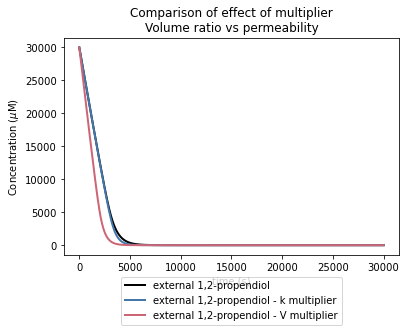

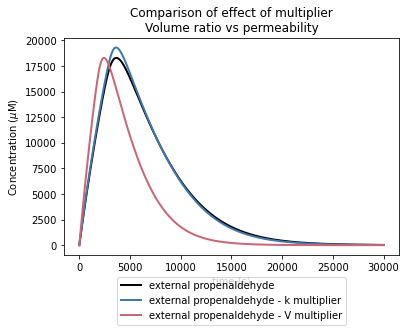

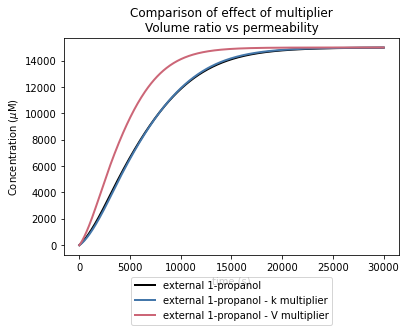

In [24]:
#CELL 12

alpha = 1.5

imp.reload(Params2)

nM = Params2.nM
tfinal = Params2.tfinal
taucde = Params2.taucde
p = Params2.p
vave = np.zeros(9)
vave[-1] = Params2.ccyt
vave[-3] = Params2.pcyt
vave[-2] = Params2.acyt
t = np.linspace(0,tfinal,501)
Rc = Params2.Rc
p[5:8] = alpha*p[5:8]

'''This is the actual integration using the equations of motion and the desired discretization'''
solmultk = odeint(derivAve,vave,t,args = (p,))

imp.reload(Params2)

nM = Params2.nM
tfinal = Params2.tfinal
taucde = Params2.taucde
p = Params2.p
vave = np.zeros(9)
vave[-1] = Params2.ccyt
vave[-3] = Params2.pcyt
vave[-2] = Params2.acyt
t = np.linspace(0,tfinal,501)
Rc = Params2.Rc
p[-2] = p[-2]/alpha

'''This is the actual integration using the equations of motion and the desired discretization'''
solmultrat = odeint(derivAve,vave,t,args = (p,))

outside, = plt.plot(t*taucde/p[3], solave[:,-3]*Params2.Kcde, lw = 2, color = 'black', label = 'external 1,2-propendiol')
outsidek, = plt.plot(t*taucde/p[3], solmultk[:,-3]*Params2.Kcde, lw = 2, color = '#4477AA', label = 'external 1,2-propendiol - k multiplier')
outsideV, = plt.plot(t*taucde/p[3], solmultrat[:,-3]*Params2.Kcde, lw = 2, color = '#CC6677', label = 'external 1,2-propendiol - V multiplier')
plt.xlabel('time (s)')
plt.ylabel('Concentration ($\mu$M)')
plt.title('Comparison of effect of multiplier\nVolume ratio vs permeability')
plt.legend(handles = [outside, outsidek, outsideV],bbox_to_anchor=(0.5, -0.1), loc=9, borderaxespad=0.)
plt.savefig('ComparisonP-multiplier', bbox_inches='tight')
plt.show()

outside2, = plt.plot(t*taucde/p[3], solave[:,-2]*Params2.Kpq, lw = 2, color = 'black', label = 'external propenaldehyde')
outside2k, = plt.plot(t*taucde/p[3], solmultk[:,-2]*Params2.Kpq, lw = 2, color = '#4477AA', label = 'external propenaldehyde - k multiplier')
outside2V, = plt.plot(t*taucde/p[3], solmultrat[:,-2]*Params2.Kpq, lw = 2, color = '#CC6677', label = 'external propenaldehyde - V multiplier')
plt.xlabel('time (s)')
plt.ylabel('Concentration ($\mu$M)')
plt.title('Comparison of effect of multiplier\nVolume ratio vs permeability')
plt.legend(handles = [outside2, outside2k, outside2V],bbox_to_anchor=(0.5, -0.1), loc=9, borderaxespad=0.)
plt.savefig('ComparisonA-multiplier', bbox_inches='tight')
plt.show()

outside3, = plt.plot(t*taucde/p[3], solave[:,-1]*Params2.Kpq, lw = 2, color = 'black', label = 'external 1-propanol')
outside3k, = plt.plot(t*taucde/p[3], solmultk[:,-1]*Params2.Kpq, lw = 2, color = '#4477AA', label = 'external 1-propanol - k multiplier')
outside3V, = plt.plot(t*taucde/p[3], solmultrat[:,-1]*Params2.Kpq, lw = 2, color = '#CC6677', label = 'external 1-propanol - V multiplier')
plt.xlabel('time (s)')
plt.ylabel('Concentration ($\mu$M)')
plt.title('Comparison of effect of multiplier\nVolume ratio vs permeability')
plt.legend(handles = [outside3, outside3k, outside3V],bbox_to_anchor=(0.5, -0.1), loc=9, borderaxespad=0.)
plt.savefig('ComparisonC-multiplier', bbox_inches='tight')
plt.show()